# Part 1: Common Analysis

### In this project, we analyse the social aspects of the pandemic by conducting a human centered data science analysis of some available COVID-19. 

### Analysis for Jackson county, Missouri from the period 1st February 2020 to 1st October 2021 

## Step 0: Data Acquisition & Manipulation

* 0.1 Importing all libraries required for the analysis
* 0.2 Importing the 3 datasets from the following sources:

    * The RAW_us_confirmed_cases.csv file from the Kaggle repository of John Hopkins University COVID-19 data.
    * The CDC dataset of masking mandates by county. 
    * The New York Times mask compliance survey data.
    
* 0.3 Filtering the dataset to select Jackson county
* 0.4 Filtering Jackson county datasets for fixed time period
* 0.5 Saving Intermediary cleaned files as csv

###  0.1 Importing all libraries required for the analysis

In [1]:
import pandas as pd
import numpy as np
import ruptures as rpt
import matplotlib.pyplot as plt
import seaborn as sns

### 0.2 Importing the 3 datasets

In [2]:
raw_us_confirmed_cases = pd.read_csv("RAW_us_confirmed_cases.csv")
cdc_dataset = pd.read_csv("U.S._State_and_Territorial_Public_Mask_Mandates_From_April_10__2020_through_August_15__2021_by_County_by_Day.csv")
mask_compliance = pd.read_csv("mask-use-by-county.csv")

In [3]:
raw_us_confirmed_cases.head()

,Province_State,Admin2,UID,iso2,iso3,code3,FIPS,Country_Region,Lat,Long_,...,10/22/22,10/23/22,10/24/22,10/25/22,10/26/22,10/27/22,10/28/22,10/29/22,10/30/22,10/31/22
0,Alabama,Autauga,84001001,US,USA,840,1001.0,US,32.539527,-86.644082,...,18480,18480,18480,18480,18480,18511,18511,18511,18511,18511
1,Alabama,Baldwin,84001003,US,USA,840,1003.0,US,30.727750,-87.722071,...,65895,65895,65895,65895,65895,65973,65973,65973,65973,65973
2,Alabama,Barbour,84001005,US,USA,840,1005.0,US,31.868263,-85.387129,...,6926,6926,6926,6926,6926,6930,6930,6930,6930,6930
3,Alabama,Bibb,84001007,US,USA,840,1007.0,US,32.996421,-87.125115,...,7560,7560,7560,7560,7560,7575,7575,7575,7575,7575
4,Alabama,Blount,84001009,US,USA,840,1009.0,US,33.982109,-86.567906,...,17286,17286,17286,17286,17286,17320,17320,17320,17320,17320


In [4]:
cdc_dataset.head()

,State_Tribe_Territory,County_Name,FIPS_State,FIPS_County,date,order_code,Face_Masks_Required_in_Public,Source_of_Action,URL,Citation
0,AL,Autauga County,1,1,4/10/2020,2,NaN,NaN,NaN,NaN
1,AL,Autauga County,1,1,4/11/2020,2,NaN,NaN,NaN,NaN
2,AL,Autauga County,1,1,4/12/2020,2,NaN,NaN,NaN,NaN
3,AL,Autauga County,1,1,4/13/2020,2,NaN,NaN,NaN,NaN
4,AL,Autauga County,1,1,4/14/2020,2,NaN,NaN,NaN,NaN


In [5]:
mask_compliance.head()

,COUNTYFP,NEVER,RARELY,SOMETIMES,FREQUENTLY,ALWAYS
0,1001,0.053,0.074,0.134,0.295,0.444
1,1003,0.083,0.059,0.098,0.323,0.436
2,1005,0.067,0.121,0.120,0.201,0.491
3,1007,0.020,0.034,0.096,0.278,0.572
4,1009,0.053,0.114,0.180,0.194,0.459


### 0.3 Filtering the dataset to select Jackson county

In [6]:
# Filtering the Raw US confirmed cases


jackson_confirmedcases = raw_us_confirmed_cases.loc[(raw_us_confirmed_cases["Admin2"] == "Jackson") & 
                                                    (raw_us_confirmed_cases["Province_State"] == "Missouri")]

jackson_fips = int(jackson_confirmedcases['FIPS'].values[0])
jackson_confirmedcases.head()


,Province_State,Admin2,UID,iso2,iso3,code3,FIPS,Country_Region,Lat,Long_,...,10/22/22,10/23/22,10/24/22,10/25/22,10/26/22,10/27/22,10/28/22,10/29/22,10/30/22,10/31/22
1589,Missouri,Jackson,84029095,US,USA,840,29095.0,US,39.010022,-94.347245,...,113419,113419,113480,113514,113560,113595,113595,113595,113595,113595


In [7]:
print("In the FIPS value, the first two digits represents State FIPS and last two represents County FIPS value",jackson_fips)

In the FIPS value, the first two digits represents State FIPS and last two represents County FIPS value 29095


In [8]:
# We use the FIPS code given above, which is 29095 for Jackson country

cdc_jackson = cdc_dataset.loc[(cdc_dataset["FIPS_State"] == 29) & (cdc_dataset["FIPS_County"] == 95)]

# Subsituting N/A with No for masking policies
cdc_jackson["Face_Masks_Required_in_Public"] = cdc_jackson["Face_Masks_Required_in_Public"].fillna("No")
cdc_jackson.tail()


<ipython-input-8-849f6ff3fc06>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cdc_jackson["Face_Masks_Required_in_Public"] = cdc_jackson["Face_Masks_Required_in_Public"].fillna("No")


,State_Tribe_Territory,County_Name,FIPS_State,FIPS_County,date,order_code,Face_Masks_Required_in_Public,Source_of_Action,URL,Citation
1207510,MO,Jackson County,29,95,8/11/2021,2,No,NaN,NaN,NaN
1207511,MO,Jackson County,29,95,8/12/2021,2,No,NaN,NaN,NaN
1207512,MO,Jackson County,29,95,8/13/2021,2,No,NaN,NaN,NaN
1207513,MO,Jackson County,29,95,8/14/2021,2,No,NaN,NaN,NaN
1207514,MO,Jackson County,29,95,8/15/2021,2,No,NaN,NaN,NaN


In [9]:
print("Length of Dataframe", len(cdc_jackson))
count_no_mask = cdc_jackson['Face_Masks_Required_in_Public'].value_counts()[0]
print("Number of rows where Face Masks are not required in public",count_no_mask  )

Length of Dataframe 493
Number of rows where Face Masks are not required in public 493


### ^ It is important to note here, that according to the CDC Mandate guidelines for Jackson county, Face Masks were not required in public

In [10]:
jackson_mask_compliance = mask_compliance.loc[mask_compliance['COUNTYFP']== jackson_fips]
jackson_mask_compliance.head()

,COUNTYFP,NEVER,RARELY,SOMETIMES,FREQUENTLY,ALWAYS
1530,29095,0.027,0.066,0.088,0.21,0.609


### 0.4 Filtering Jackson county datasets for fixed time period from 1st February 2020 to 1st October 2021

In [11]:
# Pivoting raw confirmed cases data to long format
jackson_cases = pd.melt(jackson_confirmedcases, id_vars = jackson_confirmedcases.columns[0:11], var_name = 'date', value_name = 'cases')
jackson_cases['date'] = pd.to_datetime(jackson_cases['date'], format = '%m/%d/%y')

# Filtering the dates
jackson_cases = jackson_cases.loc[(jackson_cases['date'] >= '2020-02-01') & (jackson_cases['date'] <= '2021-10-01')]


# Subsetting dataframe to only keep relevant columns

jackson_cases =  jackson_cases[jackson_cases.columns[10:]]
jackson_cases.reset_index(inplace = True, drop = True)
jackson_cases.head()

,Combined_Key,date,cases
0,"Jackson, Missouri, US",2020-02-01,0
1,"Jackson, Missouri, US",2020-02-02,0
2,"Jackson, Missouri, US",2020-02-03,0
3,"Jackson, Missouri, US",2020-02-04,0
4,"Jackson, Missouri, US",2020-02-05,0


In [12]:
cdc_jackson['date'] = pd.to_datetime(cdc_jackson['date'])

# Filtering the dates
cdc_jackson = cdc_jackson.loc[(cdc_jackson['date'] >= '2020-02-01') & (cdc_jackson['date'] <= '2021-10-01')]
cdc_jackson.sort_values(by = 'date', inplace = True)

cdc_jackson.head()

<ipython-input-12-a68850c65ddd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cdc_jackson['date'] = pd.to_datetime(cdc_jackson['date'])


,State_Tribe_Territory,County_Name,FIPS_State,FIPS_County,date,order_code,Face_Masks_Required_in_Public,Source_of_Action,URL,Citation
406980,MO,Jackson County,29,95,2020-04-10,2,No,NaN,NaN,NaN
406981,MO,Jackson County,29,95,2020-04-11,2,No,NaN,NaN,NaN
406982,MO,Jackson County,29,95,2020-04-12,2,No,NaN,NaN,NaN
406983,MO,Jackson County,29,95,2020-04-13,2,No,NaN,NaN,NaN
406984,MO,Jackson County,29,95,2020-04-14,2,No,NaN,NaN,NaN


### 0.5 Saving Intermediary cleaned files as csv

In [13]:
jackson_cases.to_csv("jackson_confirmed_cases.csv")
cdc_jackson.to_csv("jackson_cdc_mandates.csv")
jackson_mask_compliance.to_csv("jackson_mask_compliance_survey.csv")

## Step 1: Analyze

* 1.a Initial Descriptive Analysis of covid cases
* 1.b Identifying Change Points in Data
* 1.c Understanding the methology being used

### 1.a Initial Descriptive Analysis of covid cases

In [14]:
# Calculating the daily infection rate change

jackson_cases["case_rate"] = pd.Series(np.gradient(jackson_cases["cases"]), jackson_cases["date"], name='case_rate').values

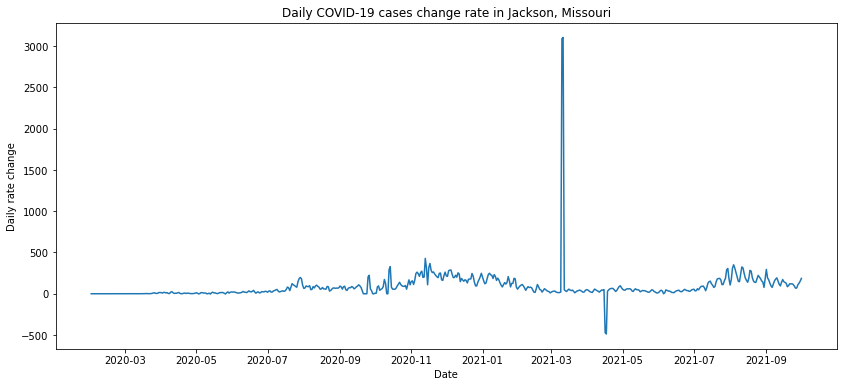

In [15]:
plt.figure(figsize=(14,6))
sns.lineplot(data = jackson_cases, x = 'date', y='case_rate')
plt.xlabel('Date')
plt.ylabel('Daily rate change')
plt.title('Daily COVID-19 cases change rate in Jackson, Missouri')
plt.show() 

This is quite an interesting visualization as we observe little change uptil March 2021 and then a sharp rise of 3000 cases around March 2021, followed by a sharp drop in April 2021.

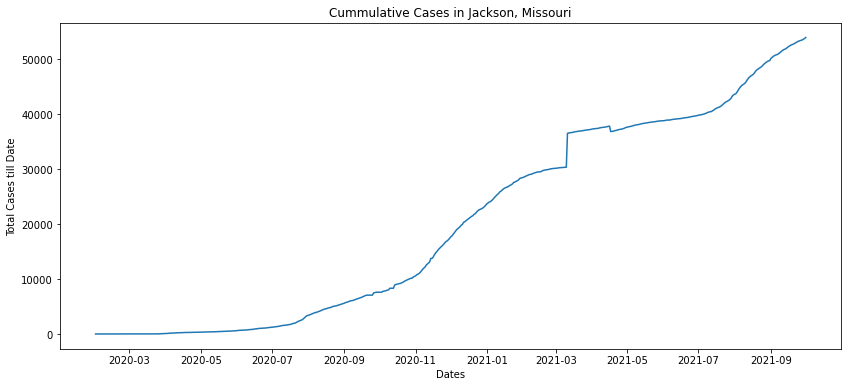

In [16]:
plt.figure(figsize=(14,6))
sns.lineplot(data = jackson_cases, x = 'date', y='cases')
plt.xlabel('Dates')
plt.ylabel('Total Cases till Date')
plt.title('Cummulative Cases in Jackson, Missouri')
plt.show()  

### 1.b Identifying Change Points in Data

The change in color of graph background shows the change point in the cases graph.

I am using the Pelt Search method and Prophet tool Recommendation attributed to Eli Copron and Charles Reinertson respectively

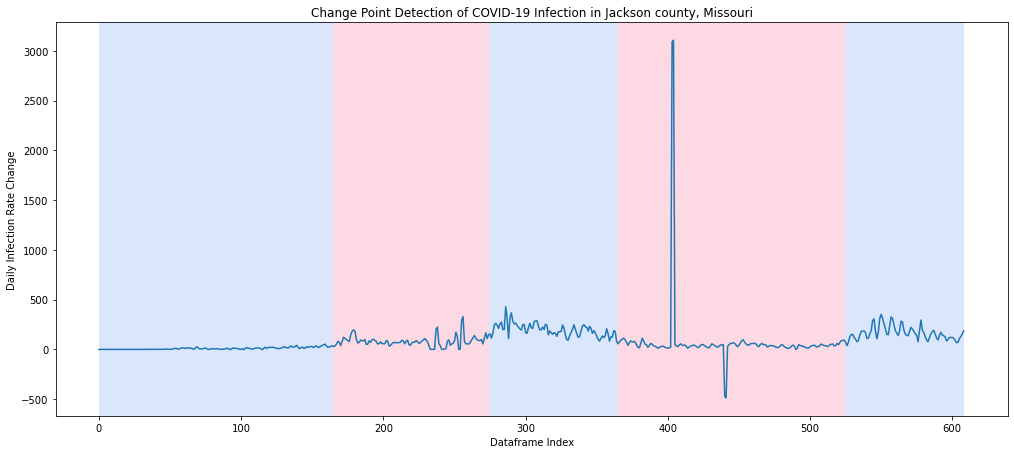

In [17]:
# Using the case rate to run PElt Search method from ruptures to detect change points

covidcases=np.array(jackson_cases['case_rate'])

model='rbf'
algo=rpt.Pelt(model=model).fit(covidcases)
result=algo.predict(pen=10)

breaks_rpt=[]
for i in result:
    breaks_rpt.append(jackson_cases.index[i-1])

rpt.display(covidcases, result, figsize=(14,6))
plt.title("Change Point Detection of COVID-19 Infection in Jackson county, Missouri")
plt.xlabel("Dataframe Index")
plt.ylabel("Daily Infection Rate Change")
plt.show()

We use Change point detection to analyze the changes in the above graph. We can then compare this to the masking policy change. According to the CDC dataset, masks were never mandated in the Jackson county. Thus for our analysis we can use the CDC National guidelines. While these were not forcefully implemented in the counties, it was the suggestion given the citizens. The CDC covid-19 timeline (https://www.cdc.gov/museum/timeline/covid19.html) was referenced to understand the timeline of national mask suggestions.


In [18]:
# Defining the timeline of CDC recommendation

mask_guidelines_1 = '2020-04-03'
openspace_guidelines_removed1 = '2021-01-01'
openspace_guidelines_set2  = '2021-02-01'
openspace_guidelines_removed2 = '2021-06-10'
all_guidelines_removed = '2022-02-25'


In [19]:
#Adding a separate column for mask guidelines by CDC in our analysis dataframe

all_mask_guidelines=[]

for i in list(jackson_cases.date):
    if str(i) < mask_guidelines_1:
        all_mask_guidelines.append("No_mask_required")
    elif str(i) < openspace_guidelines_removed1:
        all_mask_guidelines.append("Mask_required_all_places")
    elif str(i) < openspace_guidelines_set2:
        all_mask_guidelines.append("Mask_required_close_spaces")
    elif str(i) < openspace_guidelines_removed2:
        all_mask_guidelines.append("Mask_required_all_places")
    elif str(i) < all_guidelines_removed:
        all_mask_guidelines.append("Mask_required_close_spaces")
    else:
        all_mask_guidelines.append("No_mask_required")
        
jackson_cases['Masks_requirement']= all_mask_guidelines

In [20]:
# Fit and predict on the pelt search method for ruptures again 
casesdata=np.array(jackson_cases['case_rate'])

model='rbf'
algo=rpt.Pelt(model=model).fit(casesdata)
result=algo.predict(pen=10)

breaks_rpt=[]
for i in result:
    breaks_rpt.append(jackson_cases.index[i-1])

## Step 2: Visualize

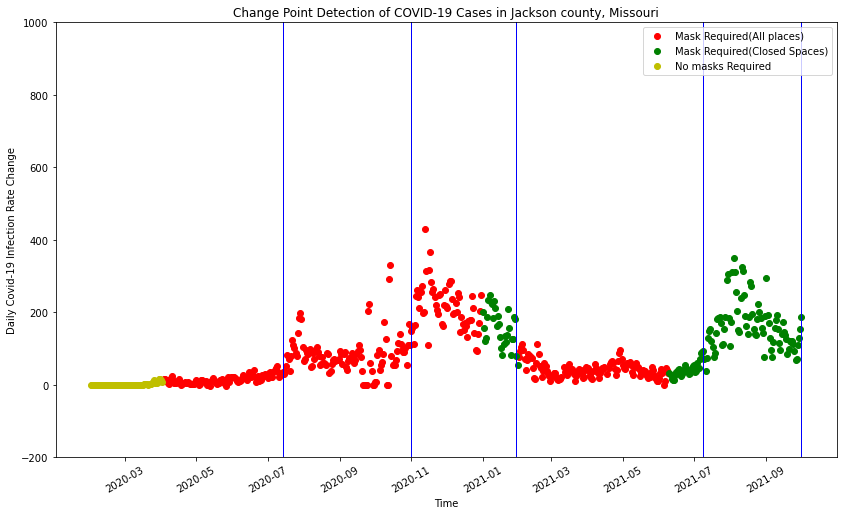

In [21]:
# Filtering data
mask_all_places = jackson_cases[jackson_cases['Masks_requirement'] == 'Mask_required_all_places']
mask_close_spaces = jackson_cases[jackson_cases['Masks_requirement'] == 'Mask_required_close_spaces']
no_masks_required = jackson_cases[jackson_cases['Masks_requirement'] == 'No_mask_required']


fig = plt.gcf()
plt.xticks(rotation=30)
plt.title("Change Point Detection of COVID-19 Cases in Jackson county, Missouri")
plt.xlabel("Time")
plt.ylabel("Daily Covid-19 Infection Rate Change")
plt.ylim((-200,1000))

# Plotting different data points setting mask policy as the color

plt.plot(mask_all_places.date,mask_all_places.case_rate, 'ro', label='Mask Required(All places)')
plt.plot(mask_close_spaces.date,mask_close_spaces.case_rate, 'go', label='Mask Required(Closed Spaces)')
plt.plot(no_masks_required.date,no_masks_required.case_rate, 'yo', label='No masks Required')


leg = plt.legend(loc="upper right")

# Plotting the verticle lines for highlighting changepoints
for x in breaks_rpt:
    plt.axvline(jackson_cases.loc[x, 'date'], lw=1, color='blue', label='Change points')
    
fig.set_size_inches(14, 8)
fig.savefig('part1_a4_visualization.png', dpi=100)

## Step 3: Inference

We can note the following points from the visualization:

1. During the first part of no mask guidelines, the cases were at a minimal, as Covid-19 had not spread to all parts of US. 

2. During the 1st change-point, around July 2020 we can observe that even though the mask guidelines required compulsory masks, there was a slight rise in cases. This could be as Jackson county did not have any strict mask mandates as this was also a few month into the pandemic when people were more aware about COVID-19.

3. A similar pattern is observed in the 2nd change-point, around November 2020, where the cases continue to rise.

4. During the 3rd change-point, February 2021, we can see that the even though mask guidelines were relaxed, there was still a decline in the cases. This could be due to the fact that vaccines had started rolling out.

5. Between the 4th and 5th change-point, from July to September 2021, with the relaxed mask guidelines the cases increased again but decreased soon.

In conclusion, there isn't a very direct relation between mask guidelines and the Covid-19 cases. This makes sense since Jackson county did not have a strict mask mandate so people would not be following CDC guidelines strictly, but rather use caution when they deem fit. We also observe a clear decrease once the vaccines started being provided